# Cost

ฟังก์ชันต้นทุนรวม (TC):
         600  
150⋅μ + ──────
        μ - 30
------------------------------
อนุพันธ์ของ TC (d(TC)/d(mu)):
         600   
150 - ─────────
              2
      (μ - 30) 
------------------------------
ผลลัพธ์จากการแก้สมการ: [28, 32]

✅ อัตราการให้บริการที่เหมาะสมที่สุด (μ) คือ: 32.00 คนต่อหน่วยเวลา

กราฟยืนยันผลลัพธ์:
  μ ที่คำนวณได้ (Symbolic): 32.0000
  μ จากกราฟ (Numerical): 32.0000
  ต้นทุนรวมต่ำสุด: 5100.00 บาท


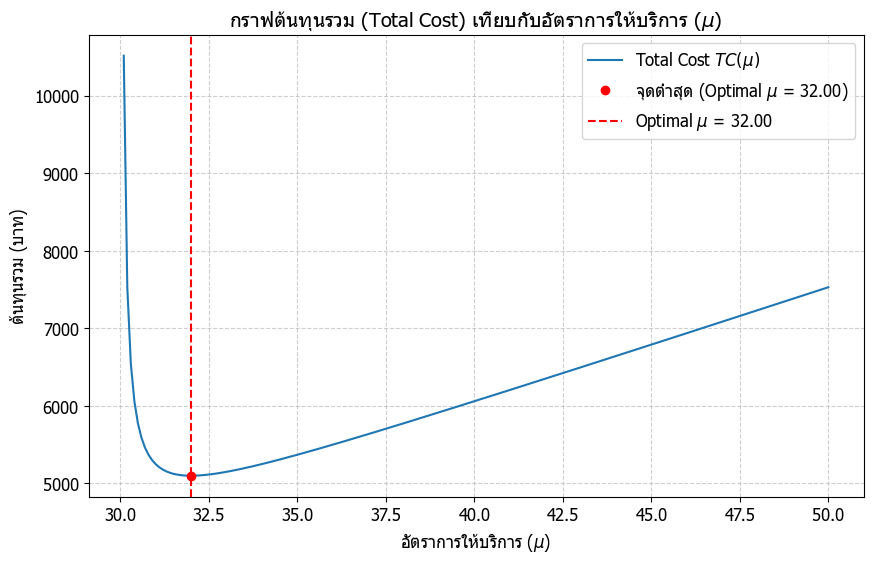

In [2]:
# %% [markdown]
# ## 📝 วิเคราะห์ปัญหาแถวคอย: การหาต้นทุนต่ำสุด (M/M/1)
#
# จากโจทย์ เราต้องการหาอัตราการให้บริการ ($\mu$) ที่ทำให้ต้นทุนรวม (Total Cost) ต่ำที่สุด
#
# ### 1. กำหนดค่าตัวแปร
# * **อัตราการมาถึง ($\lambda$):** 30 คน/หน่วยเวลา
# * **ต้นทุนการให้บริการ ($C_s$):** 150 บาท / (หน่วย $\mu$)
# * **ต้นทุนการรอคอย ($C_w$):** 20 บาท / (คน * หน่วยเวลา)
#
# ### 2. สร้างฟังก์ชันต้นทุน
# ต้นทุนรวม (TC) = (ต้นทุนบริการ) + (ต้นทุนรอคอย)
#
# $TC(\mu) = (C_s \times \mu) + (C_w \times L_s)$
#
# โดยที่ $L_s$ (จำนวนคนเฉลี่ยในระบบ) = $\frac{\lambda}{\mu - \lambda}$
#
# $TC(\mu) = 150\mu + 20 \left( \frac{30}{\mu - 30} \right)$
#
# $TC(\mu) = 150\mu + \frac{600}{\mu - 30}$
#

# %%
# ===== เซลล์ที่ 1: นำเข้าไลบรารีและตั้งค่า =====

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# ===== 💡 แก้ไข: ตั้งค่าฟอนต์ภาษาไทยสำหรับ Matplotlib =====
# ใช้ 'Tahoma' หรือฟอนต์อื่นที่รองรับภาษาไทยในเครื่องของคุณ
# เช่น 'Sarabun', 'Leelawadee UI', 'TH Sarabun New'
plt.rcParams['font.family'] = 'Tahoma'
plt.rcParams['font.size'] = 12
# =======================================================

# %% [markdown]
# ### 3. การคำนวณเชิงสัญลักษณ์ด้วย SymPy
# เราจะหาอนุพันธ์ของฟังก์ชัน $TC(\mu)$ เทียบกับ $\mu$ และให้เท่ากับ 0 เพื่อหาจุดต่ำสุด

# %%
# ===== เซลล์ที่ 2: การคำนวณด้วย SymPy =====

# 1. กำหนดสัญลักษณ์
mu = sp.symbols('mu')

# 2. กำหนดค่าคงที่
lambda_val = 30
Cs = 150
Cw = 20

# 3. สร้างฟังก์ชัน Ls และ Total Cost (TC)
Ls = lambda_val / (mu - lambda_val)
TC = (Cs * mu) + (Cw * Ls)

# แสดงฟังก์ชันต้นทุนรวม
print("ฟังก์ชันต้นทุนรวม (TC):")
sp.pprint(TC)
print("-" * 30)

# 4. หาอนุพันธ์ของ TC เทียบกับ mu
TC_diff = sp.diff(TC, mu)

print("อนุพันธ์ของ TC (d(TC)/d(mu)):")
sp.pprint(TC_diff)
print("-" * 30)

# 5. แก้สมการหาค่า mu (เมื่ออนุพันธ์ = 0)
solutions = sp.solve(TC_diff, mu)

print(f"ผลลัพธ์จากการแก้สมการ: {solutions}")

# 6. กรองคำตอบที่ใช้ได้
# เงื่อนไขของระบบ M/M/1 คือ mu > lambda (μ > 30)
valid_solutions = [sol.evalf() for sol in solutions if sol.is_real and sol > lambda_val]

if valid_solutions:
    optimal_mu = valid_solutions[0]
    print(f"\n✅ อัตราการให้บริการที่เหมาะสมที่สุด (μ) คือ: {optimal_mu:.2f} คนต่อหน่วยเวลา")
else:
    print("\n❌ ไม่พบคำตอบที่เป็นไปได้ (μ ต้องมากกว่า λ)")


# %% [markdown]
# ### 4. การแสดงผลด้วยกราฟ
# เราจะวาดกราฟของต้นทุนรวม (TC) เทียบกับค่า $\mu$ เพื่อดูว่าจุดต่ำสุดอยู่ที่ใด

# %%
# ===== เซลล์ที่ 3: การพล็อตกราฟ =====

# 1. สร้างฟังก์ชัน Python ปกติสำหรับ TC เพื่อใช้กับ Numpy
tc_func = sp.lambdify(mu, TC, 'numpy')

# 2. สร้างช่วงของค่า mu ที่จะพล็อต
mu_values = np.linspace(30.1, 50, 200)

# 3. คำนวณค่า TC
cost_values = tc_func(mu_values)

# 4. วาดกราฟ
plt.figure(figsize=(10, 6))

# ===== 💡 แก้ไข: ใช้ Raw Strings (r'...') เพื่อป้องกัน SyntaxWarning =====
plt.plot(mu_values, cost_values, label=r'Total Cost $TC(\mu)$')
plt.title(r'กราฟต้นทุนรวม (Total Cost) เทียบกับอัตราการให้บริการ ($\mu$)')
plt.xlabel(r'อัตราการให้บริการ ($\mu$)')
# ====================================================================

plt.ylabel('ต้นทุนรวม (บาท)')
plt.grid(True, linestyle='--', alpha=0.6)

# 5. ไฮไลท์จุดที่เหมาะสมที่สุด
if valid_solutions:
    optimal_mu_val = float(optimal_mu)
    optimal_cost = tc_func(optimal_mu_val)
    
    # ===== 💡 แก้ไข: ใช้ Raw Strings (r'...') =====
    # ใช้ .format() เพื่อใส่ค่าตัวแปรเข้าไปใน raw string
    plt.plot(optimal_mu_val, optimal_cost, 'ro', label=r'จุดต่ำสุด (Optimal $\mu$ = {0:.2f})'.format(optimal_mu_val))
    plt.axvline(x=optimal_mu_val, color='red', linestyle='--', label=r'Optimal $\mu$ = {0:.2f}'.format(optimal_mu_val))
    # ==============================================
    
    print(f"\nกราฟยืนยันผลลัพธ์:")
    print(f"  μ ที่คำนวณได้ (Symbolic): {optimal_mu_val:.4f}")
    
    # หาค่า μ จากกราฟ (เชิงตัวเลข) เพื่อเปรียบเทียบ
    min_mu_numerical = mu_values[np.argmin(cost_values)]
    print(f"  μ จากกราฟ (Numerical): {min_mu_numerical:.4f}")
    print(f"  ต้นทุนรวมต่ำสุด: {optimal_cost:.2f} บาท")

plt.legend()
plt.show()